In [1]:
from support.df_init import init
df = init()
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,regions_UNK,countryOfOrigin_freq_enc,countryOfOrigin_NA,countryOfOrigin_AF,countryOfOrigin_AS,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK,reviewsTotal
0,Carmencita,"(5, 6]",1894,1894.0,1.0,0,2089,1,10,2,...,0,0.399732,1,0,0,0,0,0,0,19
1,Un bon bock,"(5, 6]",1892,1892.0,12.0,0,183,1,10,2,...,0,0.046115,0,0,0,1,0,0,0,1
2,Chinese Opium Den,"(4, 5]",1894,1894.0,1.0,0,195,1,10,1,...,0,0.399732,1,0,0,0,0,0,0,0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1894.0,1.0,1,2237,1,10,3,...,0,0.399732,1,0,0,0,0,0,0,22
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1896.0,1.0,0,13115,1,10,12,...,2,0.046115,0,0,0,1,0,0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",1993,1993.0,96.0,0,11,1,10,0,...,0,0.001417,0,0,0,0,0,1,0,0
149527,Eco,"(6, 7]",2019,2019.0,14.0,0,15,1,10,4,...,0,0.017834,0,0,0,1,0,0,0,1
149528,Women Take Center Stage,"(5, 6]",2019,2019.0,NaN,0,12,1,10,2,...,0,0.000000,0,0,0,0,0,0,0,0
149529,Horrid Henry and the Christening Crisis,"(7, 8]",2011,2011.0,10.0,0,9,1,10,1,...,0,0.000000,0,0,0,0,0,0,0,0


In [2]:
from support.transformations import apply_log_scale

df = apply_log_scale(df)

<Figure size 1000x1000 with 0 Axes>

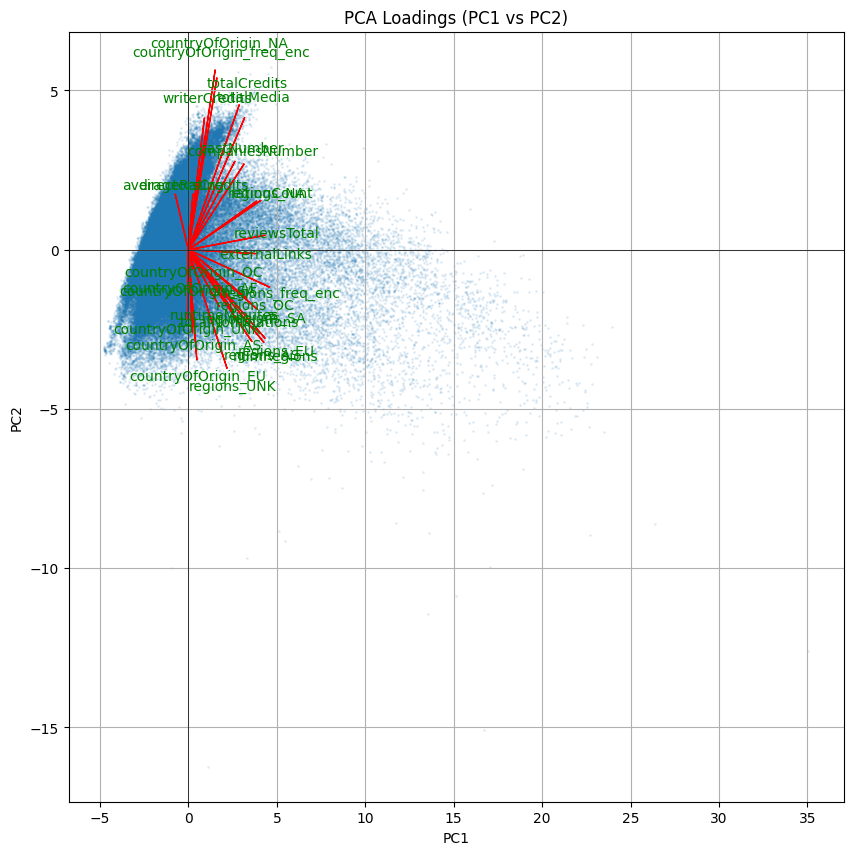

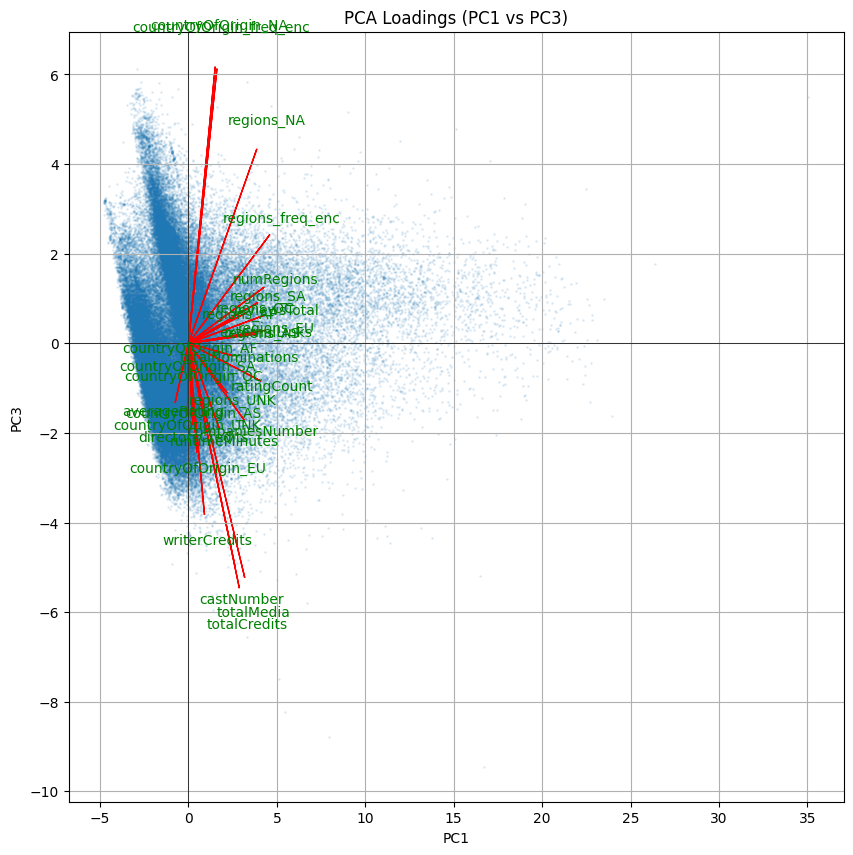

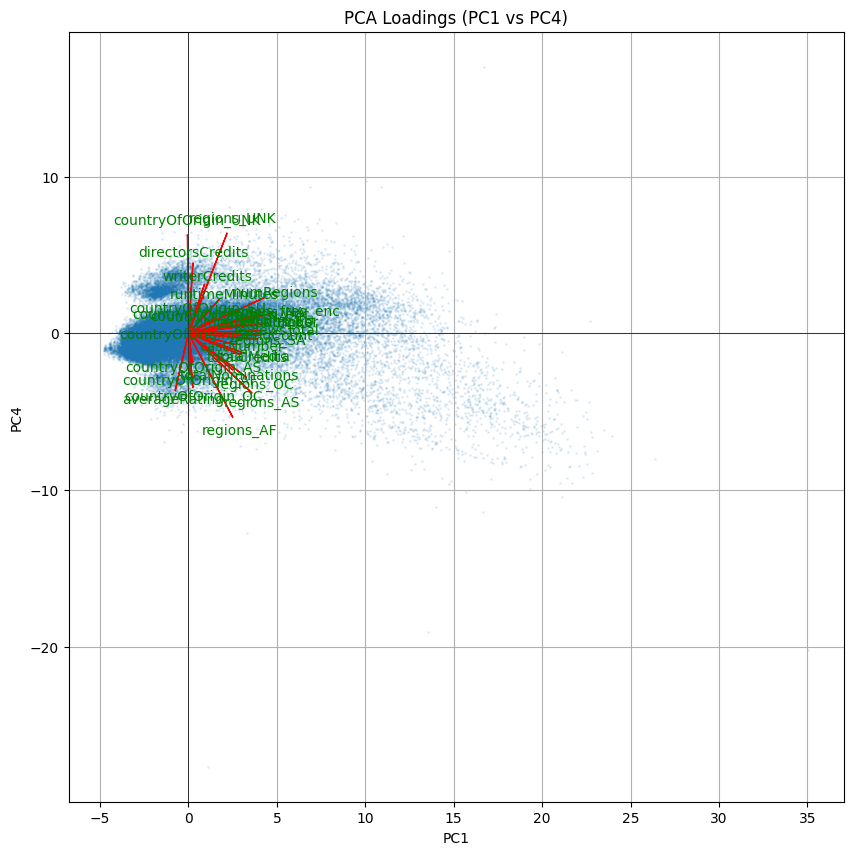

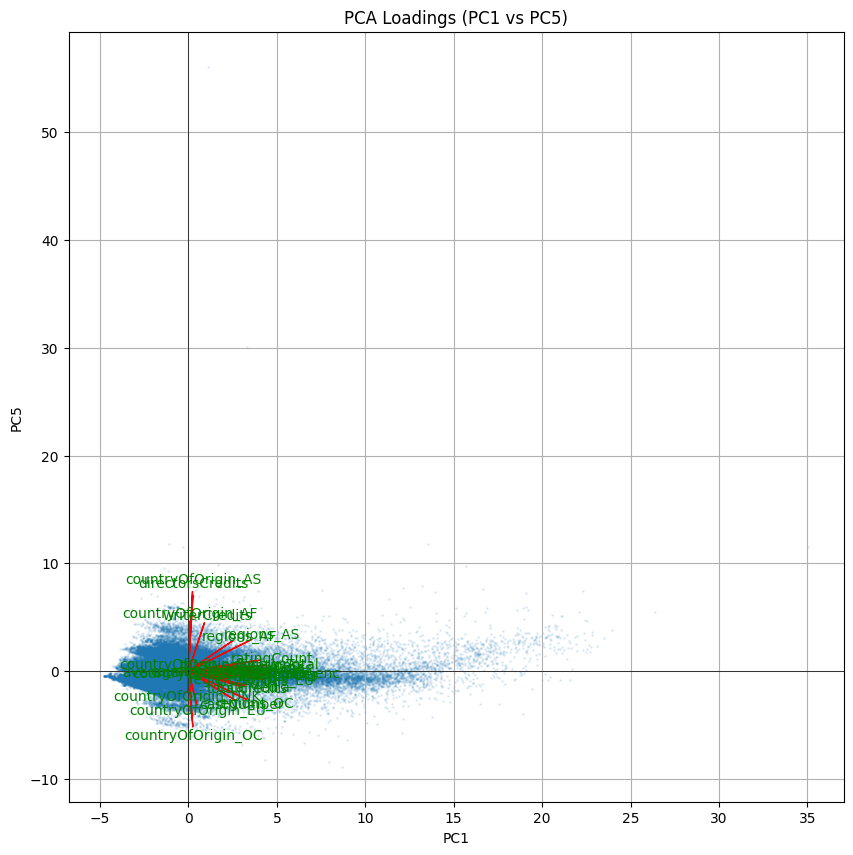

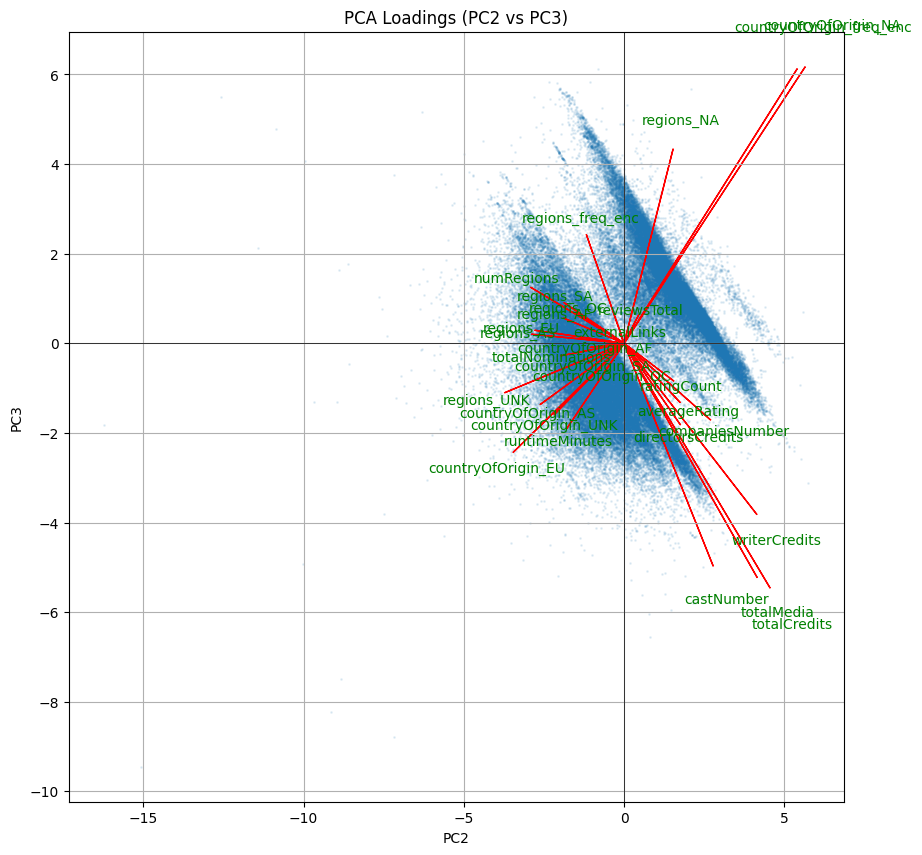

In [3]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the specified features
features = [
    'runtimeMinutes', 'totalCredits', 'reviewsTotal',
    'numRegions', 'ratingCount', 'castNumber',
    'companiesNumber', 'averageRating', 'externalLinks', 'writerCredits',
    'directorsCredits', 'totalMedia', 'totalNominations',
    'regions_freq_enc',
    'regions_EU', 'regions_NA', 'regions_AS', 'regions_AF', 'regions_OC',
    'regions_SA', 'regions_UNK',
    'countryOfOrigin_freq_enc',
    'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS',
    'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA',
    'countryOfOrigin_UNK'
]

# Drop rows with missing values in the selected features
df_cleaned = df[features].dropna()


# Scale the dataset
scaler = StandardScaler()
df_cleaned = scaler.fit_transform(df_cleaned)

# Perform PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(df_cleaned)

# Create a DataFrame for PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(5)], index=features)

# Plot PCA loadings as vectors with feature names
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
scale = 15
for pc_x, pc_y in [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2)]:
    plt.figure(figsize=(10, 10))
    plt.scatter(pca_result[:, pc_x], pca_result[:, pc_y], alpha=0.1, label='Data Points', s=1)
    for i, feature in enumerate(features):
        plt.arrow(0, 0, loadings.iloc[i, pc_x] * scale, loadings.iloc[i, pc_y] * scale, color='r', alpha=1)
        plt.text(loadings.iloc[i, pc_x] * 1.15 * scale, loadings.iloc[i, pc_y] * 1.15 * scale, feature, color='g', ha='center', va='center')

    # plt.xlim(-1, 1)
    # plt.ylim(-1, 1)
    plt.xlabel(f'PC{pc_x + 1}')
    plt.ylabel(f'PC{pc_y + 1}')
    plt.grid()
    plt.title(f'PCA Loadings (PC{pc_x + 1} vs PC{pc_y + 1})')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

In [4]:
pca.explained_variance_ratio_

array([0.29186584, 0.09326235, 0.08372989, 0.05443254, 0.04300124])

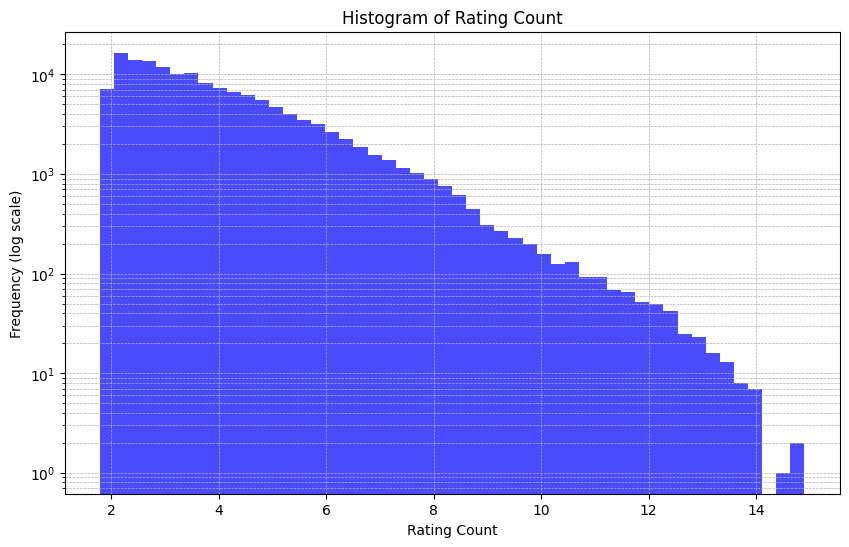

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['ratingCount'], bins=50, color='blue', alpha=0.7)
plt.yscale('log')  # Set y-axis to logarithmic scale for better visualization of depth
plt.xlabel('Rating Count')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Rating Count')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

In [6]:
df.loc[df['ratingCount'] > 500000, ['originalTitle', 'ratingCount']]

,originalTitle,ratingCount
